In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
data = pd.read_csv("dataset.csv")
df = data.copy()
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [5]:
df["model"].value_counts()

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

In [6]:
df["transmission"].value_counts()

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

In [7]:
df[df["transmission"] == "Other"]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2458,Yaris,2015,12795,Other,16733,Hybrid,0,78.0,1.5


In [8]:
# drop row which consist of "Other" to get better predict, because it has just single value

df = df.drop(index = df[df["transmission"] == "Other"].index)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [9]:
df["fuelType"].value_counts()

Petrol    4087
Hybrid    2042
Diesel     503
Other      105
Name: fuelType, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6737.0,2016.748404,2.204123,1998.0,2016.0,2017.0,2018.0,2020.0
price,6737.0,12522.350601,6345.487678,850.0,8290.0,10795.0,14995.0,59995.0
mileage,6737.0,22858.322992,19126.738154,2.0,9446.0,18514.0,31065.0,174419.0
tax,6737.0,94.711296,73.877249,0.0,0.0,135.0,145.0,565.0
mpg,6737.0,63.040003,15.836837,2.8,55.4,62.8,69.0,235.0
engineSize,6737.0,1.471293,0.436191,0.0,1.0,1.5,1.8,4.5


In [11]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.420984,-0.727826,0.283352,-0.020499,-0.045561
price,0.420984,1.000000,-0.297936,0.214533,-0.039919,0.727592
mileage,-0.727826,-0.297936,1.000000,-0.205372,0.044937,0.182619
tax,0.283352,0.214533,-0.205372,1.000000,-0.430193,0.155758
mpg,-0.020499,-0.039919,0.044937,-0.430193,1.000000,-0.106885
engineSize,-0.045561,0.727592,0.182619,0.155758,-0.106885,1.000000


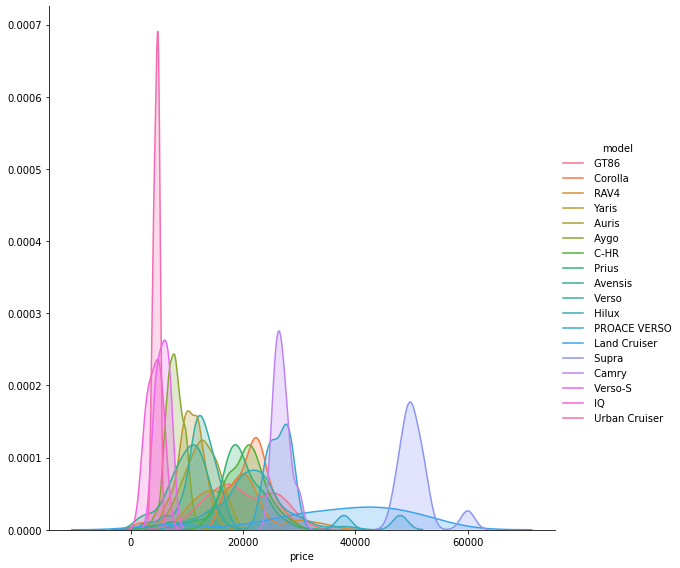

In [12]:
# price range for model names of car

(sns.FacetGrid(df, hue = "model", height = 8)
.map(sns.kdeplot, "price", shade = True)
    .add_legend());

## Data Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
# save and select required values

price = df["price"]
df_columns = df.drop(["price"], axis = 1).select_dtypes(["int64", "float64"]).columns
numeric_data = df.drop(["price"], axis = 1).select_dtypes(["int64", "float64"])

In [15]:
# scale data

scaled_data = scaler.fit_transform(numeric_data)
scaled_data

array([[-0.33957269,  0.06434805,  2.30519336, -1.69490885,  1.21219039],
       [ 0.11415623, -0.2218694 ,  0.68075676, -1.69490885,  1.21219039],
       [-0.79330161,  0.24107714,  2.30519336, -1.69490885,  1.21219039],
       ...,
       [-2.15448838,  1.21000217,  0.41001733, -0.34352862, -0.16345631],
       [-2.6082173 ,  1.97861682,  0.41001733, -0.79819861, -0.39273077],
       [-2.6082173 ,  1.16440816,  0.41001733, -0.79819861, -0.39273077]])

In [16]:
df_new = df.drop(df.select_dtypes(["int64", "float64"]), axis = 1)
df_new

,model,transmission,fuelType
0,GT86,Manual,Petrol
1,GT86,Manual,Petrol
2,GT86,Manual,Petrol
3,GT86,Manual,Petrol
4,GT86,Manual,Petrol
...,...,...,...
6733,IQ,Automatic,Petrol
6734,Urban Cruiser,Manual,Petrol
6735,Urban Cruiser,Manual,Diesel
6736,Urban Cruiser,Manual,Petrol


In [17]:
# combine data with scaled data

df_new[df_columns] = scaled_data
df_new["price"] = price

In [18]:
df_new

,model,transmission,fuelType,year,mileage,tax,mpg,engineSize,price
0,GT86,Manual,Petrol,-0.339573,0.064348,2.305193,-1.694909,1.212190,16000
1,GT86,Manual,Petrol,0.114156,-0.221869,0.680757,-1.694909,1.212190,15995
2,GT86,Manual,Petrol,-0.793302,0.241077,2.305193,-1.694909,1.212190,13998
3,GT86,Manual,Petrol,0.114156,-0.424690,0.748442,-1.694909,1.212190,18998
4,GT86,Manual,Petrol,0.114156,0.701984,0.680757,-1.694909,1.212190,17498
...,...,...,...,...,...,...,...,...,...
6733,IQ,Automatic,Petrol,-2.608217,0.373415,-1.011365,-0.261435,-1.080554,5500
6734,Urban Cruiser,Manual,Petrol,-2.608217,0.695187,0.410017,-0.798199,-0.392731,4985
6735,Urban Cruiser,Manual,Diesel,-2.154488,1.210002,0.410017,-0.343529,-0.163456,4995
6736,Urban Cruiser,Manual,Petrol,-2.608217,1.978617,0.410017,-0.798199,-0.392731,3995


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6737 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6737 non-null   object 
 1   transmission  6737 non-null   object 
 2   fuelType      6737 non-null   object 
 3   year          6737 non-null   float64
 4   mileage       6737 non-null   float64
 5   tax           6737 non-null   float64
 6   mpg           6737 non-null   float64
 7   engineSize    6737 non-null   float64
 8   price         6737 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 526.3+ KB


In [20]:
# One Hot Encoder categorical variables

dummy_df = pd.get_dummies(df_new)
dummy_df

,year,mileage,tax,mpg,engineSize,price,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.339573,0.064348,2.305193,-1.694909,1.212190,16000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.114156,-0.221869,0.680757,-1.694909,1.212190,15995,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-0.793302,0.241077,2.305193,-1.694909,1.212190,13998,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.114156,-0.424690,0.748442,-1.694909,1.212190,18998,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.114156,0.701984,0.680757,-1.694909,1.212190,17498,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,-2.608217,0.373415,-1.011365,-0.261435,-1.080554,5500,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6734,-2.608217,0.695187,0.410017,-0.798199,-0.392731,4985,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6735,-2.154488,1.210002,0.410017,-0.343529,-0.163456,4995,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6736,-2.608217,1.978617,0.410017,-0.798199,-0.392731,3995,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [21]:
# import statsmodels library to look through some statistic values

import statsmodels.api as sm

In [22]:
X = dummy_df.drop("price", axis = 1)
y = dummy_df["price"]

In [23]:
sm_model = sm.OLS(y, X).fit()

In [24]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          1.605e+04
Date:                Wed, 14 Oct 2020   Prob (F-statistic):                        0.00
Time:                        10:22:24   Log-Likelihood:                         -59681.
No. Observations:                6737   AIC:                                  1.194e+05
Df Residuals:                    6709   BIC:                                  1.196e+05
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
year                    1721.4042     32.058     53.696      0.000    1658.559    1784.249
mileage                -1192.1248     32.350    -36.851      0.000   -1255.541   -1128.709
tax                     -279.2013     26.870    -10.391      0.000    -331.875    -226.528
mpg                     -151.8752     32.951     -4.609      0.000    -216.470     -87.280
engineSize              1306.9956     74.060     17.648      0.000    1161.815    1452.176
model_ Auris           -4331.4820    122.905    -35.242      0.000   -4572.416   -4090.548
model_ Avensis         -3007.8114    182.055    -16.521      0.000   -3364.698   -2650.925
model_ Aygo            -7025.7062    168.695    -41.647      0.000   -7356.403   -6695.010
model_ C-HR             1227.3108    133.985      9.160      0.000     964.659    1489.963
model_ Camry            2515.1150    504.345      4.987      0.000    1526.438    3503.792
model_ Corolla           669.6692    148.112      4.521      0.000     379.323     960.015
model_ GT86             1853.3566    217.174      8.534      0.000    1427.626    2279.087
model_ Hilux            4020.2366    255.434     15.739      0.000    3519.505    4520.968
model_ IQ              -4640.7376    594.754     -7.803      0.000   -5806.644   -3474.831
model_ Land Cruiser     1.842e+04    333.757     55.198      0.000    1.78e+04    1.91e+04
model_ PROACE VERSO     9251.0190    444.704     20.803      0.000    8379.259    1.01e+04
model_ Prius             655.8939    161.948      4.050      0.000     338.425     973.363
model_ RAV4              576.2189    135.059      4.266      0.000     311.460     840.978
model_ Supra            2.604e+04    524.521     49.638      0.000     2.5e+04    2.71e+04
model_ Urban Cruiser   -4338.3383    818.442     -5.301      0.000   -5942.744   -2733.932
model_ Verso           -3127.4334    177.241    -17.645      0.000   -3474.881   -2779.985
model_ Verso-S         -4077.8707    942.802     -4.325      0.000   -5926.062   -2229.680
model_ Yaris           -5888.7363    123.606    -47.641      0.000   -6131.043   -5646.430
transmission_Automatic  9979.0044     81.126    123.006      0.000    9819.972    1.01e+04
transmission_Manual     8757.9676     81.706    107.189      0.000    8597.798    8918.138
transmission_Semi-Auto  1.005e+04    118.734     84.662      0.000    9819.469    1.03e+04
fuelType_Diesel         5255.2927    108.080     48.624      0.000    5043.423    5467.163
fuelType_Hybrid         8495.2750    103.621     81.984      0.000    8292.146    8698.404
fuelType_Other          8195.9596    161.804     50.654      0.000    7878.773    8513.146
fuelType_Petrol         6842.6702     74.182     92.242      0.000    66

## Modelling

In [25]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [27]:
X_train.shape

(5389, 30)

In [28]:
X_test.shape

(1348, 30)

In [29]:
def model_test(model_name): # test models with default parameters
    
    model = model_name().fit(X_train, y_train)
    print(model_name.__name__)
    print("Train MSE : ", np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    print("Test MSE : ", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    print("Train R2 Score : ", model.score(X_train, y_train))
    print("Test R2 Score : ", model.score(X_test, y_test))

In [30]:
def model_tuning(model,parameters): # seach for best parameters for models
    
    tuned_model = GridSearchCV(model, parameters, cv = 10, scoring = "neg_mean_squared_error").fit(X_train, y_train)
    return tuned_model.best_params_

In [31]:
def model_optimization(model_name, params): # test models with hyperparameters and optimization
    
    model =  model_name().set_params(**params).fit(X_train, y_train)    
    print("Tuned Train MSE : ", np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    print("Tuned Test MSE : ", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    print("Tuned Train R2 Score : ", model.score(X_train, y_train))
    print("Tuned Test R2 Score : ", model.score(X_test, y_test))
    print("--------------------------------")
    return model

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model_test(LinearRegression)

LinearRegression
Train MSE :  1687.765500295447
Test MSE :  1768.7673947665728
Train R2 Score :  0.9287850417625703
Test R2 Score :  0.9241083043027996


In [34]:
# validation score

lr_model = LinearRegression()
np.sqrt(-cross_val_score(lr_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error").mean())

1719.7593251326134

# Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

In [36]:
model_test(Ridge)

Ridge
Train MSE :  1694.6654782325238
Test MSE :  1769.8863464088581
Train R2 Score :  0.9282015648734376
Test R2 Score :  0.9240122532353542


In [37]:
# validation score

from sklearn.linear_model import RidgeCV
lambdas = 10**np.linspace(10,-2,100)*0.5 
ridge_cv = RidgeCV(alphas = lambdas, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

0.005

In [38]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [39]:
np.sqrt(mean_squared_error(y_train, ridge_tuned.predict(X_train)))

1688.1347747818809

# KNN

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
model_test(KNeighborsRegressor)

KNeighborsRegressor
Train MSE :  1032.1010695084374
Test MSE :  1249.7873099170408
Train R2 Score :  0.9733687550182705
Test R2 Score :  0.9621099629395558


In [42]:
# model hyperparameter

knn_model = KNeighborsRegressor()
knn_params = {"n_neighbors" : range(2,30)}
best_parameters = model_tuning(knn_model, knn_params)
best_parameters

{'n_neighbors': 6}

In [43]:
# tuned model results

knn_tuned = model_optimization(KNeighborsRegressor, best_parameters)
knn_tuned

Tuned Train MSE :  1079.2466038434357
Tuned Test MSE :  1249.6140308084096
Tuned Train R2 Score :  0.9708801995242725
Tuned Test R2 Score :  0.9621204688818854
--------------------------------


KNeighborsRegressor(n_neighbors=6)

# SVR

In [44]:
from sklearn.svm import SVR

In [45]:
model_test(SVR)

SVR
Train MSE :  6279.976241062273
Test MSE :  6464.782821073276
Train R2 Score :  0.014031557445618015
Test R2 Score :  -0.013819611968437062


In [46]:
svr_model = SVR(kernel = "linear")
svr_params = {"C" : [100,1000],
             "tol" : [0.1,0.01]}
best_parameters = model_tuning(svr_model, svr_params)
best_parameters

{'C': 1000, 'tol': 0.1}

In [47]:
svr_model = model_optimization(SVR, best_parameters)
svr_model

Tuned Train MSE :  1613.3016545412436
Tuned Test MSE :  1532.5524858073036
Tuned Train R2 Score :  0.9349303947680274
Tuned Test R2 Score :  0.9430251064336094
--------------------------------


SVR(C=1000, tol=0.1)

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
model_test(DecisionTreeRegressor)

DecisionTreeRegressor
Train MSE :  71.61752646170387
Test MSE :  1422.8466214532205
Train R2 Score :  0.999871771179364
Test R2 Score :  0.9508901075777858


In [50]:
cart = DecisionTreeRegressor()
cart_params = {"min_samples_split": range(2,20),
               "min_samples_leaf" : range(1,10),
               "max_leaf_nodes": range(2,10)}

In [51]:
best_parameters = model_tuning(cart, cart_params)
best_parameters

{'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [52]:
cart_tuned = model_optimization(DecisionTreeRegressor, best_parameters)
cart_tuned

Tuned Train MSE :  2693.172156030441
Tuned Test MSE :  2760.1691883019657
Tuned Train R2 Score :  0.8186676687106474
Tuned Test R2 Score :  0.8151905323966869
--------------------------------


DecisionTreeRegressor(max_leaf_nodes=9)

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
model_test(RandomForestRegressor)

RandomForestRegressor
Train MSE :  477.2045230303011
Test MSE :  1180.8742374300873
Train R2 Score :  0.9943068042534976
Test R2 Score :  0.9661732631695547


In [56]:
rf_model = RandomForestRegressor()
rf_params = {"max_features": [10,20,30],
             "min_samples_split" : [2,4,10],
             "min_samples_leaf" : [1,2,4],
            'n_estimators' : [500, 1000]}
best_parameters = model_tuning(rf_model, rf_params)
best_parameters

{'max_features': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [57]:
rf_tuned = model_optimization(RandomForestRegressor, best_parameters)
rf_tuned

Tuned Train MSE :  771.915467450667
Tuned Test MSE :  1122.3438297516227
Tuned Train R2 Score :  0.985103422508419
Tuned Test R2 Score :  0.9694434262908413
--------------------------------


RandomForestRegressor(max_features=20, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=1000)

# XGBoost

In [58]:
from xgboost import XGBRegressor

In [59]:
model_test(XGBRegressor)

XGBRegressor
Train MSE :  624.3204544823342
Test MSE :  1147.226767699657
Train R2 Score :  0.9902554420813015
Test R2 Score :  0.9680734969674798


In [60]:
xgb_model = XGBRegressor()
xgb_params = {'colsample_bytree': [0.4,0.5,0.6,0.9,1], 
     'n_estimators':[300, 500, 1000],
     'max_depth': [2,3,5,6],
     'learning_rate': [0.1, 0.01, 0.3]}
best_parameters = model_tuning(xgb_model, xgb_params)
best_parameters

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300}

In [62]:
xgb_tuned = model_optimization(XGBRegressor, best_parameters)
xgb_tuned

Tuned Train MSE :  777.5347175809381
Tuned Test MSE :  1110.7520936234323
Tuned Train R2 Score :  0.984885750293696
Tuned Test R2 Score :  0.9700713525916607
--------------------------------


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# LightGBM

In [62]:
from lightgbm import LGBMRegressor

In [63]:
model_test(LGBMRegressor)

LGBMRegressor
Train MSE :  973.330234754285
Test MSE :  1115.124387541962
Train R2 Score :  0.976315324338811
Test R2 Score :  0.9698352704053933


In [64]:
lgb_model = LGBMRegressor()
lgb_params = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.2, 1],
    'n_estimators': [300, 500,1000],
    'max_depth': [3,5,10,20]}

best_parameters = model_tuning(lgb_model, lgb_params)
best_parameters

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 20,
 'n_estimators': 1000}

In [65]:
lgb_tuned = model_optimization(LGBMRegressor, best_parameters)
lgb_tuned

Tuned Train MSE :  980.9097878906575
Tuned Test MSE :  1106.6615771335432
Tuned Train R2 Score :  0.9759450117136563
Tuned Test R2 Score :  0.9702913804529107
--------------------------------


LGBMRegressor(colsample_bytree=0.6, learning_rate=0.01, max_depth=20,
              n_estimators=1000)

# Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

In [67]:
model_test(GradientBoostingRegressor)

GradientBoostingRegressor
Train MSE :  1097.381715606139
Test MSE :  1218.8255794174102
Train R2 Score :  0.969893348661216
Test R2 Score :  0.9639640538599941


In [68]:
gbm_model = GradientBoostingRegressor()
gbm_params = {'learning_rate': [0.001, 0.1, 0.01],
    'max_depth': [3,8,20],
    'n_estimators': [300, 500, 1000],
    'subsample': [1,0.5,0.75]}
best_parameters = model_tuning(gbm_model, gbm_params)
best_parameters

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1}

In [69]:
gbm_tuned = model_optimization(GradientBoostingRegressor, best_parameters)
gbm_tuned

Tuned Train MSE :  867.3831108269671
Tuned Test MSE :  1124.902048775644
Tuned Train R2 Score :  0.9811908601006011
Tuned Test R2 Score :  0.9693039690316347
--------------------------------


GradientBoostingRegressor(n_estimators=500, subsample=1)

Better performance is from XGBoost model

## Model Evaluate

In [71]:
col_names = X_train.columns
col_names

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Auris',
       'model_ Avensis', 'model_ Aygo', 'model_ C-HR', 'model_ Camry',
       'model_ Corolla', 'model_ GT86', 'model_ Hilux', 'model_ IQ',
       'model_ Land Cruiser', 'model_ PROACE VERSO', 'model_ Prius',
       'model_ RAV4', 'model_ Supra', 'model_ Urban Cruiser', 'model_ Verso',
       'model_ Verso-S', 'model_ Yaris', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

In [72]:
xgb_tuned.feature_importances_

array([4.55467440e-02, 1.14179039e-02, 6.71170605e-03, 9.42802057e-03,
       2.58460253e-01, 4.93608713e-02, 8.65083933e-03, 4.15397212e-02,
       4.64297011e-02, 3.93277546e-03, 8.93217046e-03, 1.26334578e-02,
       4.84996010e-03, 9.33824922e-05, 1.14402682e-01, 5.72050782e-03,
       1.21508185e-02, 1.15375640e-02, 5.31842560e-02, 3.94616873e-05,
       5.26927970e-03, 1.68798433e-05, 2.19718982e-02, 6.95839571e-03,
       1.42114490e-01, 2.42589358e-02, 1.73365679e-02, 5.36252046e-03,
       1.05786754e-03, 7.06303269e-02], dtype=float32)

In [73]:
# feature importance data

importance = pd.Series(data = xgb_tuned.feature_importances_, index = col_names)
importance *= 100
importance

year                       4.554675
mileage                    1.141790
tax                        0.671171
mpg                        0.942802
engineSize                25.846025
model_ Auris               4.936087
model_ Avensis             0.865084
model_ Aygo                4.153972
model_ C-HR                4.642970
model_ Camry               0.393278
model_ Corolla             0.893217
model_ GT86                1.263346
model_ Hilux               0.484996
model_ IQ                  0.009338
model_ Land Cruiser       11.440269
model_ PROACE VERSO        0.572051
model_ Prius               1.215082
model_ RAV4                1.153756
model_ Supra               5.318426
model_ Urban Cruiser       0.003946
model_ Verso               0.526928
model_ Verso-S             0.001688
model_ Yaris               2.197190
transmission_Automatic     0.695840
transmission_Manual       14.211449
transmission_Semi-Auto     2.425894
fuelType_Diesel            1.733657
fuelType_Hybrid            0

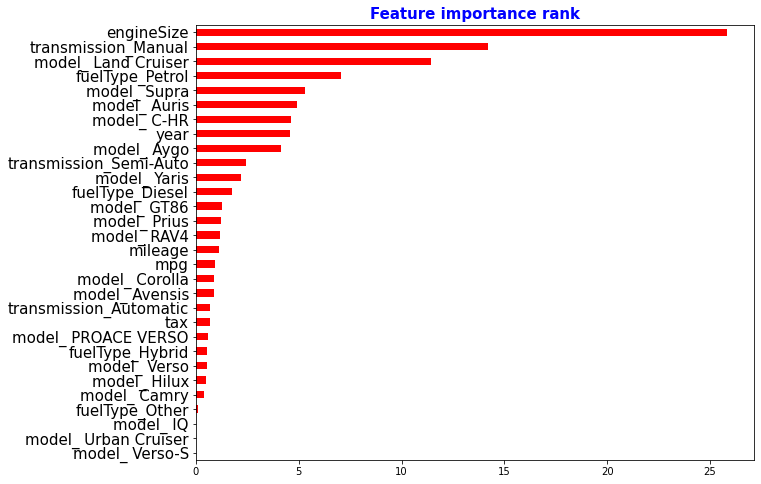

In [74]:
# plotting

plt.figure(figsize = (10,8))

ax = importance.sort_values().plot(kind = "barh", color = "r");

ax.yaxis.set_tick_params(labelsize=15)

plt.title("Feature importance rank", fontsize = 15, fontweight = "bold", color = "b");

In [75]:
y_pred = xgb_tuned.predict(X_test)
y_pred

array([32843.395 ,  6195.2124, 10741.134 , ..., 10532.086 ,  6478.4683,
        7929.535 ], dtype=float32)

In [76]:
y_test.head()

381     37440
2477     5999
2856    11440
2018     8995
2185    11000
Name: price, dtype: int64

Text(0.5, 1.0, 'M')

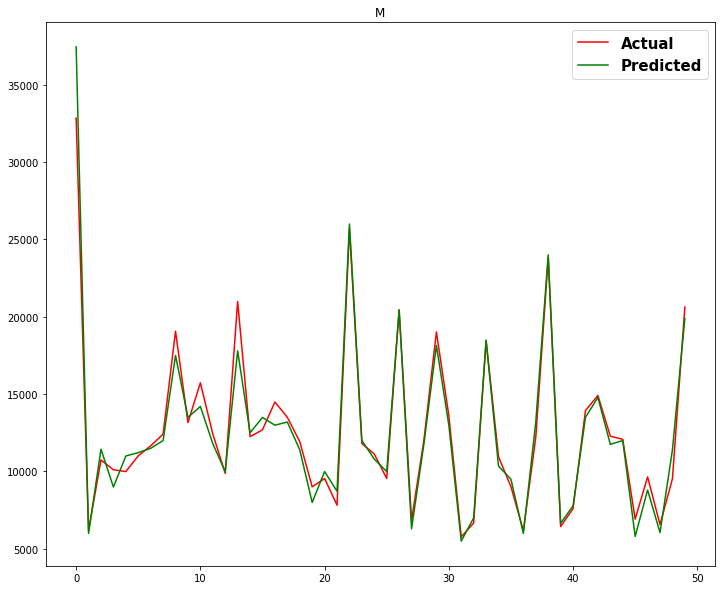

In [77]:
# plotting actual and predicted values as line plot

fig, ax = plt.subplots(figsize = (12,10))

ax = plt.plot(y_pred[:50], label = "Actual", color = "r")
ax = plt.plot(y_test.values[:50], label = "Predicted", color = "g")

legend_properties = {"weight":"bold", "size" : 15}
plt.legend(prop = legend_properties);

plt.title("M")

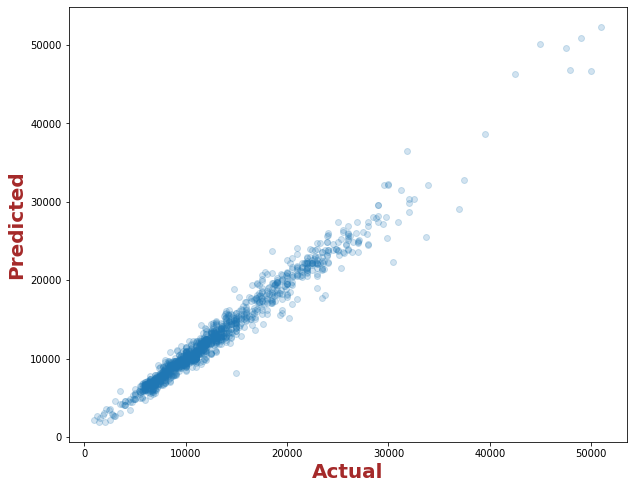

In [78]:
# scatter plot between y_test and y_pred data

plt.figure(figsize = (10,8))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel("Actual",size=20, color = "brown", fontweight = "bold")
plt.ylabel("Predicted",size=20, color = "brown", fontweight = "bold")
plt.show()